# Exploratory Data Analysis

First I load in some modules and color settings.

In [1]:
# %load src/plot_settings.py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

plt.style.use('seaborn')
%matplotlib inline

pink = '#fe447d'
orange = '#f78f2e'
orange_y = '#fedc0c'
lime = '#d1f20a'
emerald = '#5cd05b'
teal = '#03c1cd'
blue = '#0e10e6'
violet = '#9208e7'
orange_r = '#f84c00'
yellow = '#f3f354'
mint = '#bff1e5'
green = '#3bc335'
sea = '#7af5ca'
blue_l = '#448bff'
blue_d = '#101ab3'
fuchsia = '#d645c8'
green_n = '#0afe15'
cyan = '#0acdfe'
orange_n = '#ff9600'
fuchsia_d = '#b21ca1'

## Loading data

Time to use the data from my pipeline.

In [2]:
# Read file obtained from my pipeline
usage_df = pd.read_csv('data/usage_timeseries.csv', index_col=0)
usage_df.head()

,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6,Week 7,Week 8,Week 9,Week 10,...,Week 22,Week 23,Week 24,Week 25,Week 26,Week 27,Week 28,Week 29,Week 30,Week 31
Weapon Name,,,,,,,,,,,,,,,,,,,,,
Splattershot,0.1710,0.1598,0.1548,0.1462,0.0941,0.0940,0.0852,0.0887,0.0858,0.0793,...,0.0652,0.0652,0.0563,0.0535,0.0461,0.0429,0.0444,0.0422,0.0372,0.0355
Range Blaster,0.0683,0.0639,0.0617,0.0634,0.0577,0.0541,0.0396,0.0324,0.0298,0.0238,...,0.0203,0.0232,0.0208,0.0198,0.0151,0.0183,0.0155,0.0167,0.0133,0.0130
Splat Roller,0.0671,0.0693,0.0755,0.0712,0.0742,0.0759,0.0766,0.0802,0.0827,0.0801,...,0.0613,0.0656,0.0650,0.0644,0.0593,0.0467,0.0499,0.0506,0.0464,0.0481
N-ZAP '85,0.0615,0.0665,0.0714,0.0693,0.0776,0.1217,0.1369,0.1290,0.1301,0.1416,...,0.0738,0.0713,0.0785,0.0771,0.0635,0.0596,0.0642,0.0653,0.0663,0.0619
Splat Brella,0.0494,0.0583,0.0591,0.0615,0.0570,0.0529,0.0312,0.0220,0.0199,0.0178,...,0.0207,0.0128,0.0123,0.0122,0.0136,0.0116,0.0102,0.0100,0.0127,0.0119


In [3]:
# A quick look at some statistics
usage_df.describe()

,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6,Week 7,Week 8,Week 9,Week 10,...,Week 22,Week 23,Week 24,Week 25,Week 26,Week 27,Week 28,Week 29,Week 30,Week 31
count,55.000000,55.000000,56.000000,57.000000,58.000000,59.000000,61.000000,62.000000,62.000000,64.000000,...,76.000000,77.000000,78.000000,79.000000,84.000000,84.000000,84.000000,84.000000,84.000000,88.000000
mean,0.018176,0.018185,0.017857,0.017542,0.017245,0.016944,0.016397,0.016126,0.016126,0.015625,...,0.013155,0.012990,0.012822,0.012653,0.011902,0.011900,0.011908,0.011905,0.011904,0.011365
std,0.026351,0.025407,0.025232,0.024279,0.020734,0.022918,0.022495,0.022204,0.022496,0.022867,...,0.015316,0.015382,0.015139,0.014638,0.012257,0.012348,0.012694,0.012796,0.012711,0.012278
min,0.000900,0.000900,0.000800,0.000600,0.000900,0.000700,0.000800,0.001000,0.000800,0.001100,...,0.000800,0.000900,0.001000,0.000700,0.000600,0.000900,0.000600,0.000900,0.000600,0.000100
25%,0.005000,0.005050,0.004950,0.004900,0.004500,0.004800,0.005500,0.004925,0.004525,0.004850,...,0.003875,0.004000,0.003675,0.004050,0.004200,0.004000,0.004275,0.003850,0.003775,0.003600
50%,0.010400,0.010500,0.009150,0.009700,0.009450,0.008400,0.008300,0.008200,0.008250,0.008000,...,0.008250,0.008200,0.007300,0.007300,0.007700,0.008350,0.008050,0.007950,0.007950,0.007050
75%,0.019200,0.018200,0.017650,0.017100,0.018875,0.018150,0.018000,0.017700,0.017175,0.016200,...,0.015125,0.014600,0.014675,0.014800,0.013875,0.014425,0.013925,0.014625,0.014875,0.015050
max,0.171000,0.159800,0.154800,0.146200,0.094100,0.121700,0.136900,0.129000,0.130100,0.141600,...,0.073800,0.071300,0.078500,0.077100,0.063500,0.059600,0.064200,0.065300,0.066300,0.061900


The missing values actually work to my advantage here, the addition of new weapons is represented by the weapon count increasing and the mean usage decreases due to there being more weapons.

## Spaghetti plot visualization

A good way to look at these multiple timeseries is with a spaghetti plot. It is not very good for presenting but can help me visualize data.

In [4]:
def spaghetti(df, name='Spaghetti Plot'):
    """ 
    Makes a spaghetti plot out of a dataframe, includes a mean line.
  
    Parameters: 
    df (df): a Pandas dataframe indexed with the variables to plot and columns containing timeframe data.
    name (str): Name of plot.
  
    Returns: 
    nothing, but prints a plot
    """
        
    # Transpose for plotting
    dft = df.transpose()
    
    # Make new collumn to plot x
    dft['x'] = np.arange(1, dft.shape[0]+1)

    # multiple line plot
    fig, ax = plt.subplots(1, figsize=(16, 8))
    num=0
    for column in dft.drop('x', axis=1):
        num+=1
        ax.plot(dft['x'], dft[column], marker='', linewidth=2, alpha=.5, label=column)
        
    # Plot a mean line
    x = np.arange(1,32)
    ax.plot(x, df.mean()[x-1], linewidth=6, color='black')

    # Add legend
    ax.legend(loc=2, ncol=2)

    # Add titles
    plt.title(name, loc='center', fontsize=30, fontweight=0)
    plt.xlabel("Time (in weeks starting 10/28/17)", fontsize=20)
    plt.ylabel("Usage", fontsize=20);

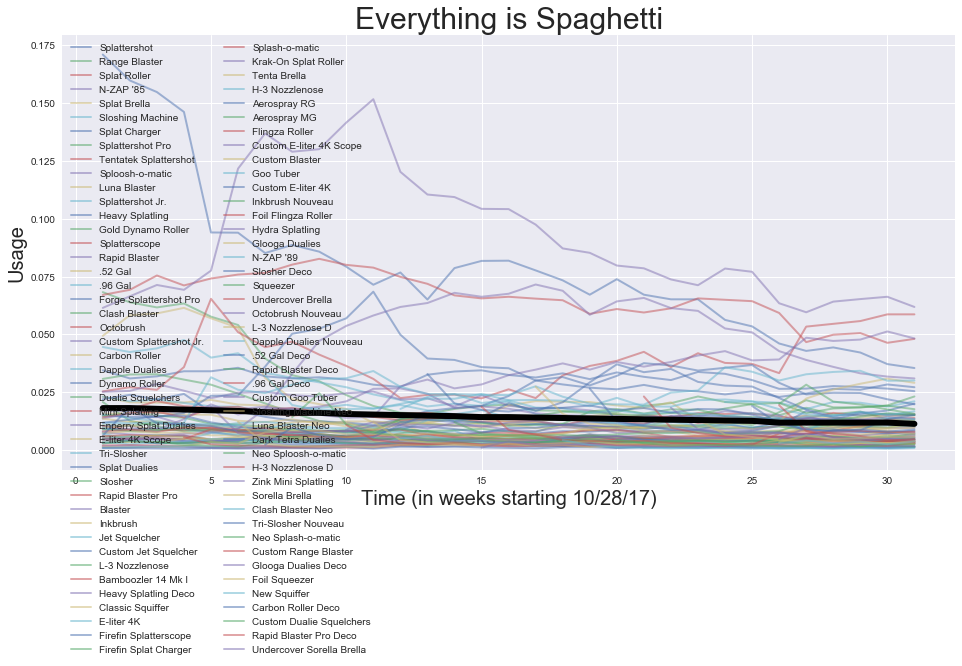

In [5]:
# spaghetti plot everything
spaghetti(usage_df, 'Everything is Spaghetti')

#save
plt.savefig('img/everything.png');

This plot is next to useless, and not quite worth the effort ot make it actually readable. However the highest few lines really stand out and have some interesting peaks and valleys. Time to look at a smaller subset.

## A better spaghetti
I decide to took at only the most used weapons according to multiple criteria.
* Usage in final week: this weapon was popular towards the end when the meta became more stable.
* Average usage: this weapon was popular throughout.
* Peak usage: this weapon was extremely popular at one point.

In [6]:
# Top 10 based on usage in final week
final = usage_df.sort_values(by=['Week 31'], ascending=False).head(10)

In [7]:
# Top 10 based on average use
tdf = usage_df.transpose()
overall = tdf.reindex(tdf.mean().sort_values(ascending=False).index, axis=1).transpose().head(10)
# In this case I use mean instead of sum since mean ignores the empty values
# which compensates for weapons added later in the game.

In [8]:
# Top 10 based on peak usage
tdf = usage_df.transpose()
peak = tdf.reindex(tdf.max().sort_values(ascending=False).index, axis=1).transpose().head(10)

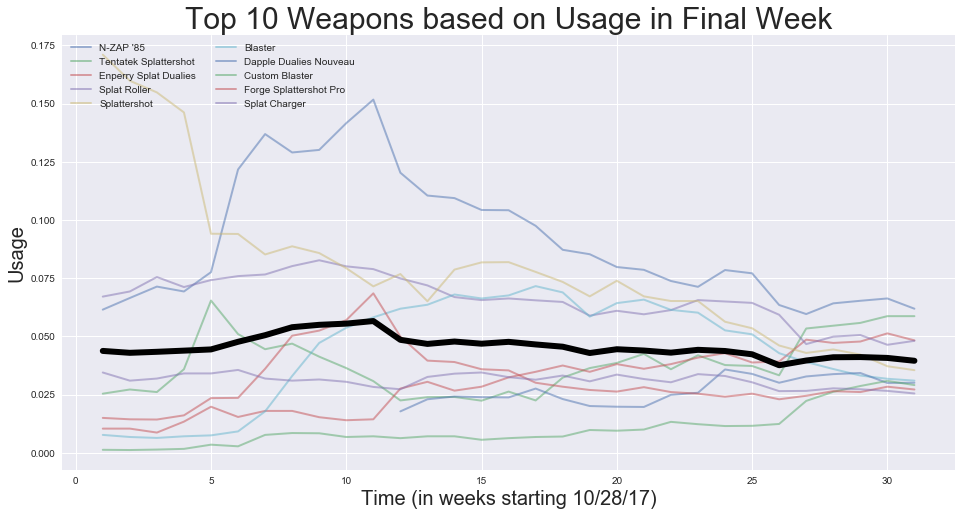

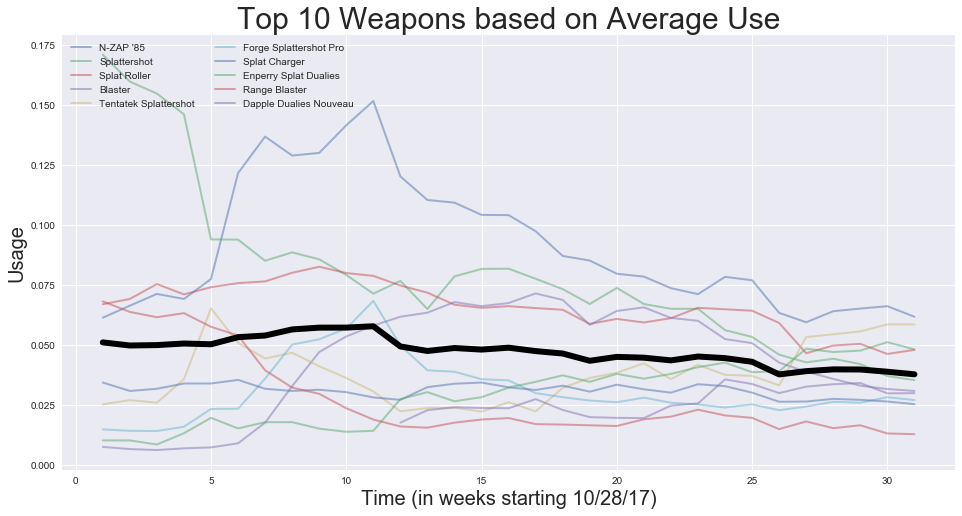

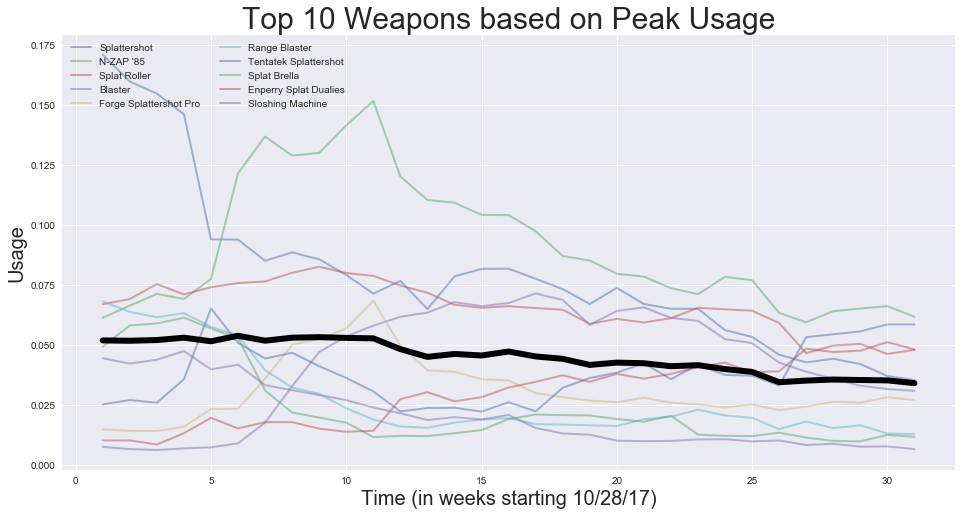

In [9]:
# Plot them all! There's definitely a more elegant way to do this but my function is rudimentary and this works
spaghetti(final, 'Top 10 Weapons based on Usage in Final Week')
plt.savefig('img/final10.png')
spaghetti(overall, 'Top 10 Weapons based on Average Use')
plt.savefig('img/avg10.png')
spaghetti(peak, 'Top 10 Weapons based on Peak Usage')
plt.savefig('img/peak10.png')

A few observations:
* There were a quite a few weapons that showed up in all 3 plots, meaning that they were definitely used often, and a meta is fundamentally based on usage.
* The peaks and highest fluctuations happen early, before 15 weeks, while towards the end all the usage seems to converge. Metas are usually most unstable early in a game's lifetime and tend to stabilize as players figure out the best strategies.
* There is a steady decline in the mean usage on all the plots, this is attributed to more weapons being added in the game leading to a lower average usage proportion.


## Further investigation of Top Weapons

I want to look at the weapons that showed up in all 3 top 10 lists and try to uncover the reasons for their high usage.

In [10]:
# Find the weapons present in all 3 previous plots
top = []
for element in usage_df.index:
    if element in final.index and element in overall.index and element in peak.index:
        top.append(element)
top

['Splattershot',
 'Splat Roller',
 "N-ZAP '85",
 'Tentatek Splattershot',
 'Forge Splattershot Pro',
 'Enperry Splat Dualies',
 'Blaster']

There are a lot of shooter (rifle) class weapons in this list, 4 out of 7. There are 1 each of roller (melee), dualies (dual pistols), and blaster (explosive). My personal favorite from this list are the Enperry Splat Dualies.
![Enperry Splat Dualies](https://cdn.wikimg.net/en/splatoonwiki/images/6/69/S2_Weapon_Main_Enperry_Splat_Dualies.png)

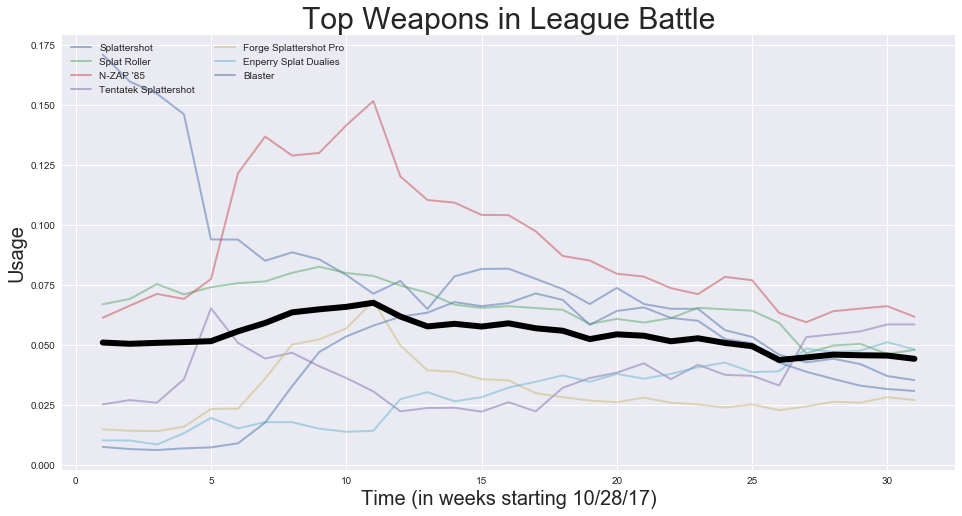

In [11]:
# Plot the top weapons
spaghetti(usage_df.loc[top,:], 'Top Weapons in League Battle')

# Save
plt.savefig('img/top.png')

Some observations:
* Two weapons that caught my attention are the Splattershot and Tentatek Splattershot. These are variant weapons, where they have an identical main (gun) but a different sub (grenade) and special. The Splattershot starts as the most used weapon but is eventually overtaken by the Tentatek. I think this is due to patches buffing (increasing the power of) the Tentatek's Inkjet special but I cannot test that with current data.
* At a glance, the N-ZAP '85 appears to be the most consistently popular weapon. It is quite infamous in the game for being 'overused', expecially in high-level team play where this data is from. I would like to analyze if it was truly overused.

I would like to see if there are any correlations so I used a seaborn heatmap.

In [12]:
def heatmapper(df):
    """ 
    Draws a simple heatmap of a dataframe based on correlation of the rows.
  
    Parameters: 
    df (df): a Pandas dataframe indexed with the items to calculate distribution on.
  
    Returns: 
    nothing, but prints a plot
    """
    
    # calculate the correlation matrix
    corr = df.transpose().corr()

    # plot the heatmap
    sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap="coolwarm");

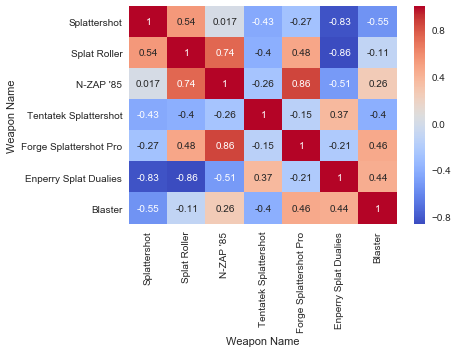

In [13]:
# generate heatmap of top weapons
heatmapper(usage_df.loc[top,:])

These are the strongest correletions accompanied by my best guess as to why based on game knowledge.

Positive Correlations

+ N-ZAP '85 and Splat Roller
    * Not sure, may be coincidence since both were considered very good weapons initially but Splashdown was eventually discovered to be one of the weakest specials.
+ N-ZAP '85 and Forge Splattershot Pro
    * These two compliment each other as the N-ZAP is a close range Shooter while the Forge is a long range Shooter.
    
Negative Correlations

- Enperry Splat Dualies and Splattershot
    * These two compete with each other as they fill a very similar role of fast, close range weapons.
- Enperry Splat Dualies and Splat Roller
    * Based on the increasing trend of the Dualies compared to the decrease of the Roller I would guess that the manuverability of Dualies allows them to counter the low range of Rollers.
    
I am not at a point where I can do much with correlations, so I will keep them in mind and move on.

## Testing The N-ZAP '85

![img](https://cdn.wikimg.net/en/splatoonwiki/images/e/e9/S2_Weapon_Main_N-ZAP_%2785.png)

The N-ZAP was (and still is) extremely prevalent, at one point it was pretty much expected you would see one every game.

The two main reasons that the community thought the N-ZAP was powerful at the time were:
* It is a Shooter (rifle) class main weapon, which is considered the most versitile of the weapon types.
* It has the Ink Armor special, which was considered almost mandatory in high-level team play due to its power in team fights.

The three things I want to test are:
1. How often does it show up in a game assuming each player chooses their weapon independently. This is definitely a false assumption but it will give a rough idea of its prevalence.
2. Is it the most used shooter overall?
3. Is it the Ink Armor weapon of choice by a significant margin?

### Modeling N-ZAP Usage
I would like to see the probability of encountering N-ZAPs in matches since at one point the Splatoon community believed that they were in most, if not all matchess. Matches in splatoon are teams of 4 vs 4, for a total of 8 players. Assuming each player choses their weapon indenpendently (a likely incorrect assumption), N-ZAP usage can be modeled by a binomial distribution with:

$$n = 8$$
$$p = N-ZAP\ '85_{usage\ proportion}$$

I will first look at the N-ZAP when it was most popular, and likely when players clamoring over its overuse was most egregious.

In [14]:
# Create a distribution based on max value
nzap_max = stats.binom(8, usage_df.loc["N-ZAP '85"].max())

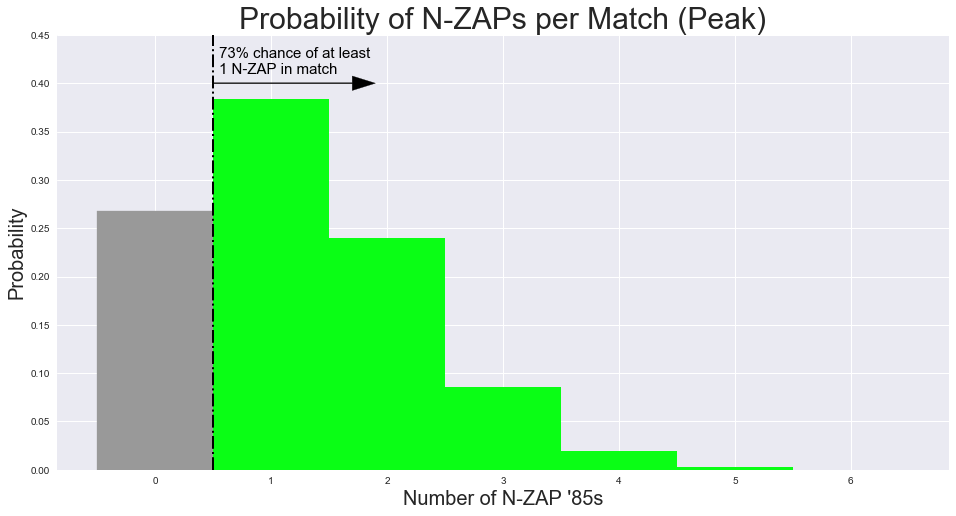

In [15]:
# Plot the distribution.
fig, ax2 = plt.subplots(figsize=(16, 8))

# Plot the PMF
color = green_n
ax2.set_xlabel("Number of N-ZAP '85s", fontsize=20)
ax2.set_ylabel('Probability', fontsize=20)
bars = ax2.bar(range(7), [nzap_max.pmf(i) for i in range(7)],  width=1.0, color=color)
bars[0].set_color('#999999')

# Plot a vertical line at 1, inspired by Samuel
color = 'black'
p = 100 * (1-nzap_max.cdf(0))
ax2.axvline(0.5, color=color, ls='-.', linewidth=2)
ax2.arrow(0.5, .4, 1.2, 0, color=color, head_width=.015, head_length=.2)
ax2.text(0.55, .41, '{:2.0f}% chance of at least\n1 N-ZAP in match'.format(p), fontsize=15, color=color)

ax2.set_ylim(0, 0.45)

plt.title('Probability of N-ZAPs per Match (Peak)', loc='center', fontsize=30, fontweight=0)

#save
plt.savefig('img/nzapmax.png');

In [16]:
# Calculate the probability of seeing at least 1 N-ZAP in a game
1-nzap_max.cdf(0)


0.7318389261938116

There was a 73% chance to see at least one N-ZAP in every game in this time period. This does line up with the community opinion of the N-ZAP being overused. While it is not quite 100%, the phrase "every game" can be expected to be used in hyperbole, and I would certinaly clasifiy almost 3 out of 4 as "most" games.

However this peak usage was only for one week and the N-ZAPs usage was quite varied along the entire timeframe, so I would like to calculate the average probability as well.

In [17]:
# Create a distribution based on mean value
nzap_dist = stats.binom(8, usage_df.loc["N-ZAP '85"].mean())


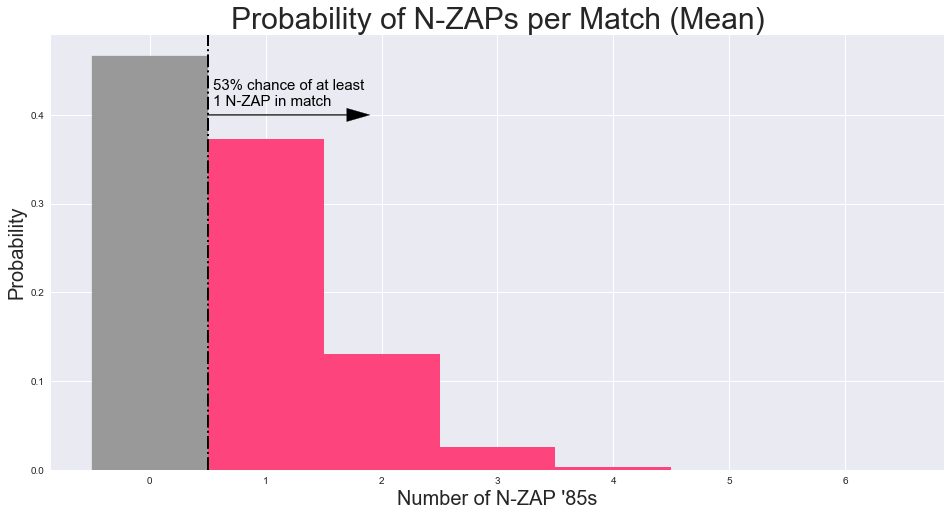

In [18]:
# Plot the distribution again.
fig, ax2 = plt.subplots(figsize=(16, 8))

# Plot the PMF
color = pink
ax2.set_xlabel("Number of N-ZAP '85s", fontsize=20)
ax2.set_ylabel('Probability', fontsize=20)
bars = ax2.bar(range(7), [nzap_dist.pmf(i) for i in range(7)],  width=1.0, color=color)
bars[0].set_color('#999999')

# Plot a vertical line at 1, inspired by Samuel
color = 'black'
p = 100 * (1-nzap_dist.cdf(0))
ax2.axvline(0.5, color=color, ls='-.', linewidth=2)
ax2.arrow(0.5, .4, 1.2, 0, color=color, head_width=.015, head_length=.2)
ax2.text(0.55, .41, '{:2.0f}% chance of at least\n1 N-ZAP in match'.format(p), fontsize=15, color=color)

plt.title('Probability of N-ZAPs per Match (Mean)', loc='center', fontsize=30, fontweight=0)

#save
plt.savefig('img/nzapmaxavg.png');

In [19]:
# Calculate the probability of seeing at least 1 N-ZAP in a game
1-nzap_dist.cdf(0)


0.5331903577501327

53% is definitely a lower percent than what the community led me to believe at the time. I would not say that slightly over half qualifies for the intention of "most games", semantically maybe. It is still a very high percent considering the game has over 80 weapons to chose from, but that is nowhere near the perception that it is in every game.

For fun, I will calculate the probability of seeing any given weapon showing up in a game if every weapon was used equally.

In [20]:
# count number of weapons (non null values) for each week, get the mean number of weapons in the game
n = usage_df.count().mean()

# create the distribution if every weapon was used equally
base_dist = stats.binom(8, 1/n)

# calculate probability
1-base_dist.cdf(0)

0.10835217992945512

At just over 10% there is not any point to test N-ZAP usage to hypothetical evenly distributed usage. It clearly shows up way more than than what would be considered average.

### Versus Other Shooters
Since the top weapons list was packed with shooters (rifles), I will compare the usages of the N-ZAP '85 to the the other shooters that made it into the top weapons list.
* Splattershot
* Tentatek Splattershot
* Forge Splattershot Pro
* Enperry Splat Dualies*

*I also include the Emperry Splat Dualies since it overlaps quite a bit with the N-ZAP in role and playstyle and is more similar to it than the Forge Splattershot Pro.

In [21]:
# Reindex with onlt the shooters
shooter = usage_df.reindex(["N-ZAP '85", 'Splattershot', 'Tentatek Splattershot',
                            'Forge Splattershot Pro', 'Enperry Splat Dualies'])

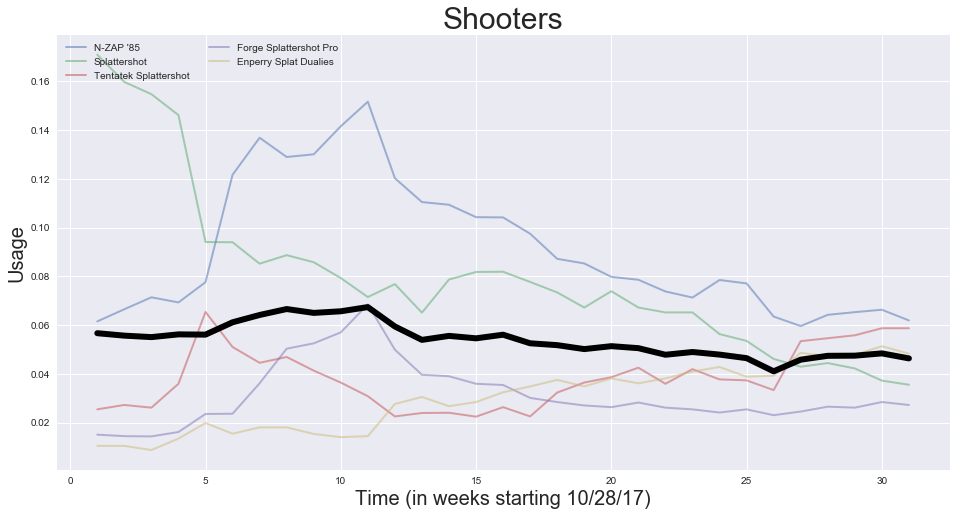

In [22]:
# spaghetti plot the shooters
spaghetti(shooter, 'Shooters')

#save
plt.savefig('img/shooters.png');

It looks like the usage of the N-ZAP is the highest and well above the mean.

![img](https://cdn.wikimg.net/en/splatoonwiki/images/6/60/S2_Weapon_Main_Splattershot.png)

The splattershot is interesting in that it started as the most used weapon then started dropping quickly while the N-ZAP climbed rapidly. The splattershot was the best weapon in the first game so many players must have stuck to it until the merits of the N-ZAP were discovered and people started switching over.

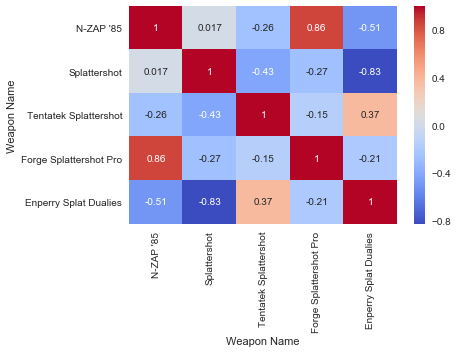

In [23]:
# look at the correlation
heatmapper(shooter)

As I expected, the N-ZAP's correlations are mostly neutral or negative except for the Forge Splattershot Pro (my thoughts on that above). Since these shooters all have a similar playstyle and fufill the same role.

## Formal Hypothesis Testing Segment


#### State a Scientific Question

> Is the N-ZAP '85 used more on average than the Splattershot?

#### State Null Hypothesis

> The N-ZAP '85 is used, at most, equally as the Splattershot.


#### State the Alternate Hypothesis

> The N-ZAP '85 is used more than the Splattershot.

#### In Mathematical Terms

>$$ p_N = P(\text{player uses N-ZAP '85}) $$
>$$ p_S = P(\text{player uses Splattershot}) $$

>$$ H_0: \ p_N \leq p_S $$
>$$ H_a: \ p_N > p_S $$

#### Decide Rejection Threshold

> Standard $\alpha = 0.05$

#### Get the Data

In [24]:
# convert rows to list
a = shooter.loc["N-ZAP '85"].tolist()
b = shooter.loc['Splattershot'].tolist()

#### Calculate p-value

In [25]:
# perform mann whitney test
out = stats.mannwhitneyu(a, b, alternative="greater")
print("p-value = {:2.3f}".format(out.pvalue))

p-value = 0.064


#### Compare p-value
>$0.064 > 0.05$

In [26]:
# frivolous code to demonstrate concept
if out.pvalue < 0.05:
    print('Reject Null Hypothesis')
else:
    print('Fail to Reject Null Hypothesis')

Fail to Reject Null Hypothesis


#### Publish Data and Code Online With Explicit Instructions for Replicating Result

> This document is already on [github](https://github.com/Rokushou/Splatoon2_Meta_EDA).

#### Conclusion

> Due to failure of rejecting the null hypothesis I cannot say that the N-ZAP '85 was used more than the Splattershot on average. This is surprising since the plot showed that the N-ZAP had higher usage than the Splattershot for the majority of the time period. This result demonstrates the importance of hypothesis testing and how looking at the data directly (or through a visualization) is not sufficient.

Now I want to look at the other comparisons of all the other weapon pairs without going through formal hypothesis testing. I will keep $\alpha = 0.05$ but use a function to get all p values at once.

In [27]:
# %load src/mannwhitney.py
def mannwhitney_dfcalc(df, disp=True, alternative='greater'):
    """
    Calculates the p-values of all combinations of columns in a dataframe.
    When set to one-sided, will only return p-values in in the direction that yields proper results.
    ex. will not return a > b = 0.95, instead will calculate and return b > a

    Parameters:

    df (df): Pandas dataframe with collumns which to compute t-tests on.
    disp (bool): Whether to print results or not.
    alternative (‘two-sided’, ‘less’, or ‘greater’):
        Whether to get the p-value for the one-sided hypothesis (‘less’ or ‘greater’)
        or for the two-sided hypothesis (‘two-sided’). Defaults to two-sided on invalid input.

    Returns:
    (dict): A dictionary keyed by names of compared columns with values of mann whitney output

    """
    import pandas as pd
    import scipy.stats as stats

    # pull column names from dataframe
    names = df.columns

    # print title line
    if disp:
        print('p-value for:')

    # determine the comparator symbol, default to two-sided
    if alternative== 'greater':
        comp = '>'
    elif alternative == 'less':
        comp = '<'
    else:
        alternative = 'two-sided'
        comp = '!='

    # initialize dictionary
    out = {}

    # iterate through dataframe in a 'triangle'
    for i in range(len(names)):
        for j in range(i + 1 , len(names)):
            a = df[names[i]].tolist()
            b = df[names[j]].tolist()

            # caclulate mann whitney
            res = stats.mannwhitneyu(a, b, alternative=alternative)

            # If p-value is greater than .5, calculate in the other direction
            if res.pvalue > .5 and alternative != 'two-sided':
                res = stats.mannwhitneyu(b, a, alternative=alternative)
                # store in dictionary
                out["{} {} {}".format(names[j], comp, names[i])] = res
                # print current calculation
                if disp:
                    print("{} {} {}: {:2.3f}".format(names[j], comp, names[i], res.pvalue))
            else:
                # store in dictionary
                out["{} {} {}".format(names[j], comp, names[i])] = res
                # print current calculation
                if disp:
                    print("{} {} {}: {:2.3f}".format(names[i], comp, names[j], res.pvalue))
    return out


In [28]:
mannwhitney_dfcalc(shooter.transpose(), alternative='greater');

p-value for:
N-ZAP '85 > Splattershot: 0.064
N-ZAP '85 > Tentatek Splattershot: 0.000
N-ZAP '85 > Forge Splattershot Pro: 0.000
N-ZAP '85 > Enperry Splat Dualies: 0.000
Splattershot > Tentatek Splattershot: 0.000
Splattershot > Forge Splattershot Pro: 0.000
Splattershot > Enperry Splat Dualies: 0.000
Tentatek Splattershot > Forge Splattershot Pro: 0.012
Tentatek Splattershot > Enperry Splat Dualies: 0.022
Enperry Splat Dualies > Forge Splattershot Pro: 0.489


Observations:
* The N-ZAP and Splattershot are clearly more used than everything else, with p-values close to 0.
* The Tentatek Splattershot is the 3rd most used weapon beating out the others with p < 0.05.
* The Enperry Splat Dualies and Forge Splattershot Pro are close to equal, with a p-value close to 0.5.

### Ink Armor Analysis

![img](https://cdn.wikimg.net/en/splatoonwiki/images/9/93/S2_Weapon_Special_Ink_Armor.png)

Ink Armor is a very powerful ability in high-level play since it benefits the whole team and can only be fully utilized by good teamwork. As a result, teams usually want 1 Ink Armor weapon as having multiple does not scale well. Therefore the N-ZAP being overused should mean lower usage of other Ink Armor weapons.

In [29]:
# Selecting all weapons with Ink Armor
ink_armor = ['.96 Gal', 'Classic Squiffer', 'Gold Dynamo Roller', 'H-3 Nozzlenose D', "N-ZAP '85",
             'Splattershot Jr.', 'Tri-Slosher']
ia_df = usage_df.reindex(ink_armor)

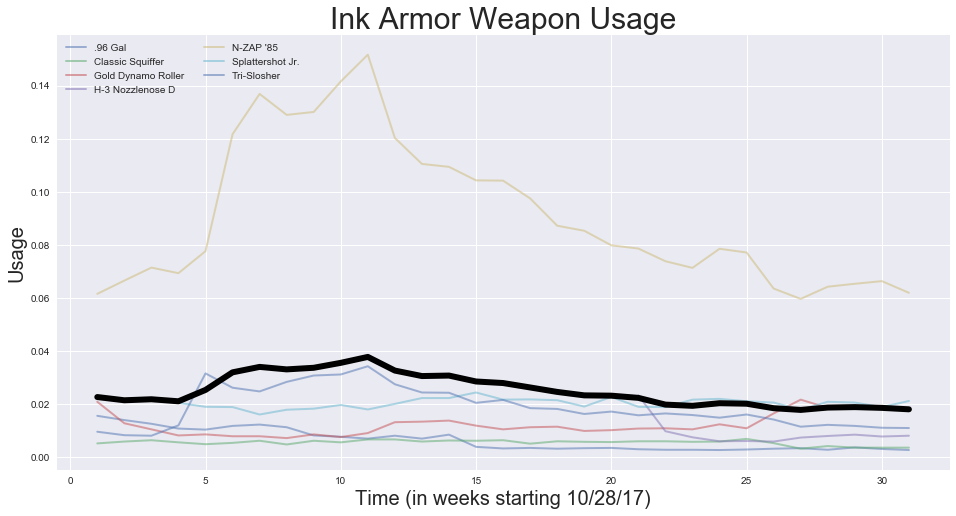

In [30]:
# spaghetti plot the Ink Armor weapons
spaghetti(ia_df, 'Ink Armor Weapon Usage')

#save
plt.savefig('img/ia.png');

It looks like the N-ZAP '85 has more usage than all other ink armor weapons combined. I personally saw a lot of Tri-Sloshers, but looks like they are not as prevalent in high-level play.

![img](https://cdn.wikimg.net/en/splatoonwiki/images/3/32/S2_Weapon_Main_Tri-Slosher.png)

A bucket used to splash paint. Truly a sophisticated and high-tech weapon.

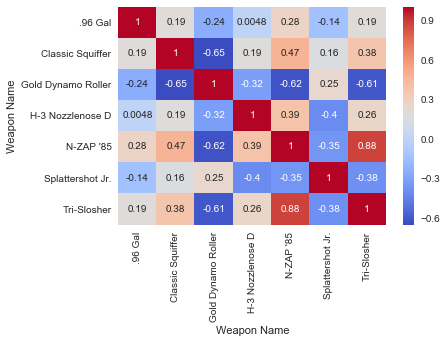

In [31]:
# heatmap the Ink Armor weapons
heatmapper(ia_df)

These correlations are not very useful as the N-ZAP seems to have an almost equal ammount of positive and negative corelations.

It is very interesting that it is such positively correlated with the Tri-Slosher. I think they both increased in usage when players first discovered the power of ink armor. Usage for the N-ZAP dropped due to shifts in the meta while the Tri-Slosher was diretly nerfed (made weaker) through a patch.

I do not know thow to intepret the negative correlation with the Gold Dynamo Roller as I am not personally familiar with that weapon. It is an extremely slow but powerful weapon leading to a very specialized and niche playstyle.

Since the N-ZAP is clearly used more than any other Ink Armor weapon I will test it against all the others combined.

In [32]:
# Extract N-Zap row
nzap = ia_df.reindex(["N-ZAP '85"])
nzap

,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6,Week 7,Week 8,Week 9,Week 10,...,Week 22,Week 23,Week 24,Week 25,Week 26,Week 27,Week 28,Week 29,Week 30,Week 31
Weapon Name,,,,,,,,,,,,,,,,,,,,,
N-ZAP '85,0.0615,0.0665,0.0714,0.0693,0.0776,0.1217,0.1369,0.129,0.1301,0.1416,...,0.0738,0.0713,0.0785,0.0771,0.0635,0.0596,0.0642,0.0653,0.0663,0.0619


In [33]:
# Sum all other columns
others =  ia_df.drop(["N-ZAP '85"])
others = pd.DataFrame(others.sum(), columns=['Other Weapons']).transpose()
others

,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6,Week 7,Week 8,Week 9,Week 10,...,Week 22,Week 23,Week 24,Week 25,Week 26,Week 27,Week 28,Week 29,Week 30,Week 31
Other Weapons,0.074,0.0617,0.0591,0.0566,0.074,0.0697,0.0668,0.0691,0.0716,0.0713,...,0.0643,0.0636,0.0633,0.0634,0.0651,0.0645,0.0661,0.0662,0.0632,0.0638


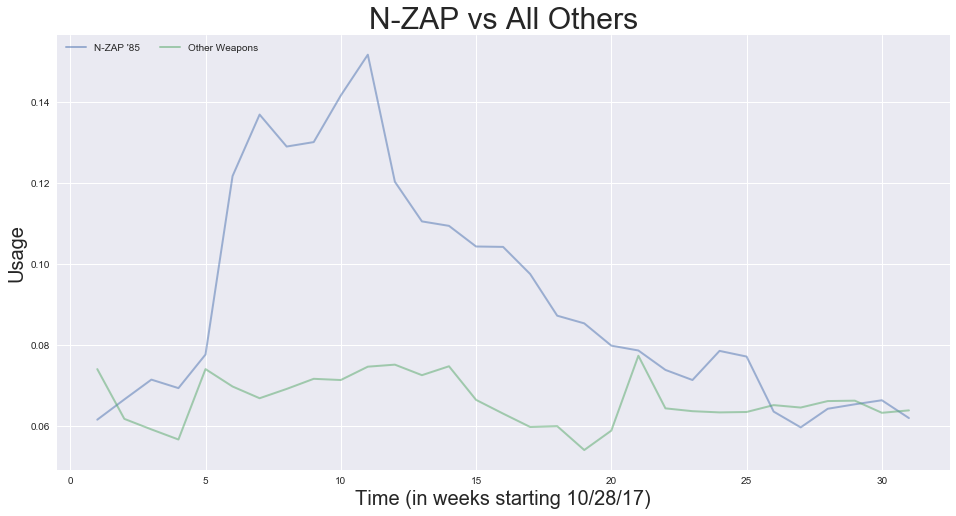

In [34]:
# plot the two lines, I copied the spaghetti function to supress the mean line

# Transpose for plotting
dft = pd.concat([nzap, others]).transpose()
    
# Make new collumn to plot x
dft['x'] = np.arange(1, dft.shape[0]+1)

# multiple line plot
fig, ax = plt.subplots(1, figsize=(16, 8))
num=0
for column in dft.drop('x', axis=1):
    num+=1
    ax.plot(dft['x'], dft[column], marker='', linewidth=2, alpha=.5, label=column)
    
# Add legend
ax.legend(loc=2, ncol=2)

# Add titles
plt.title('N-ZAP vs All Others', loc='center', fontsize=30, fontweight=0)
plt.xlabel("Time (in weeks starting 10/28/17)", fontsize=20)
plt.ylabel("Usage", fontsize=20);

#save
plt.savefig('img/vsia.png');

It looks like my initial assumption was correct. While it is fairly obvious that N-ZAP usage is higher, I will stell test if the N-ZAP '85 is more used than all other Ink Armor weapons combined. Because statistics.

#### State the Null Hypothesis
The N-ZAP is *not* used more on average than the other Ink Armor Weapons combined, it is at best, equally used.

$$ p_N = P(\text{player uses N-ZAP '85}) $$
$$ p_I = P(\text{player uses any other Ink Armor weapon}) $$

$$ H_0: \ p_N \leq p_I $$
$$\therefore$$
$$ H_a: \ p_N > p_I $$

I will use a Welch's t-test, which is the following formula recreated in the function t_test.

$$ T = \frac{\text{Difference in sample averages}}{\sqrt{\frac{\hat \sigma^2_A}{n_A} + \frac{\hat \sigma^2_B}{n_B}}} $$

In [35]:
# %load src/ttest.py
def t_test(sample_1, sample_2, disp=False):
    """
    Performs a student's t-test and returns relavant statistics.

    Parameters:
    sample_1 (lst): a list with values for sample 1.
    sample_2 (lst): a list with values for sample 2.
    disp (bool): determines printng of values in formated strings. Does not affect return.

    Returns:
    (tup): contains t-value, degrees of freedom, and p-value
    """
    import numpy as np
    import scipy.stats as stats

    # compute sample size
    n1 = len(sample_1)
    n2 = len(sample_2)

    # t-test
    numerator = np.mean(sample_1) - np.mean(sample_2)
    denominator_sq = (np.var(sample_1) / n1) + (np.var(sample_2) / n2)
    t = numerator / np.sqrt(denominator_sq)

    # degrees of freedom
    df = (
        ((np.var(sample_1)/n1 + np.var(sample_2)/n2)**(2.0)) /
        ((np.var(sample_1)/n1)**(2.0)/(n1 - 1) + (np.var(sample_2)/n2)**(2.0)/(n2 - 1))
    )

    # create student's t distribution
    students = stats.t(df)

    # p-value
    t_abs = abs(t)
    p = students.cdf(-t_abs) + (1 - students.cdf(t_abs))

    if disp:
        print("Welch Test Statistic: {:2.2f}".format(t))
        print("Degrees of Freedom for Welch's Test: {:2.2f}".format(df))
        print("p-value: {:2.2f}".format(p))
    return (t, df, p)


In [36]:
# A test based on data given in lectures to verifiy accuracy of function
matt_heights = [1.5, 0.9, 0.9, 1.3, 2.1, 1.9, 1.6, 1.4, 2.3, 1.0, 1.5, 0.9, 2.1,
                1.3, 1.4, 2.1, 1.2, 1.7, 1.7, 2.0, 1.6, 1.2, 1.6, 1.7, 1.5]
nick_heights = [1.9, 1.8, 1.3, 2.3, 1.7, 1.9, 2.7, 2.1, 2.2, 1.5, 1.8, 2.0, 1.1,
                1.7, 2.1, 1.5, 2.3, 1.5, 2.0, 2.4, 1.5, 1.4, 1.6, 1.8, 1.0]
t_test(matt_heights, nick_heights, True);

Welch Test Statistic: -2.38
Degrees of Freedom for Welch's Test: 47.97
p-value: 0.02


With a working function, I will now test the N-ZAP against the other weapons.

In [37]:
# Convert dataframes to lists
nzap_lst = nzap.iloc[0].values.tolist()
others_lst = others.iloc[0].values.tolist()

# run t-test and get the degrees of freedom
t, df, p = t_test(nzap_lst, others_lst, True)

Welch Test Statistic: 4.95
Degrees of Freedom for Welch's Test: 32.87
p-value: 0.00


The p-value is zero? That does not make sense.

In [38]:
# show the entire p-value
p

2.1823608426641907e-05

P is an extremely small number and thus does not show up in the formattted version. Maybe a plot will help.

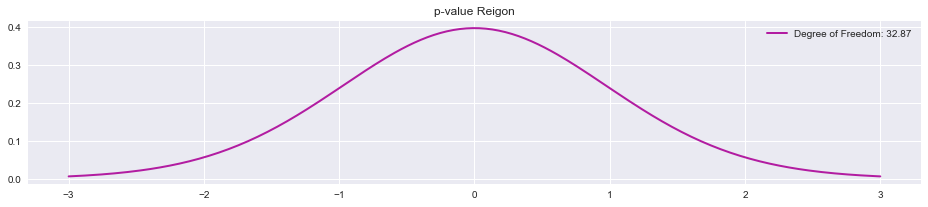

In [39]:
# generate the distribution
x = np.linspace(-3, 3, num=250)
students = stats.t(df)

# plot my df curve and shade p regions
fig, ax = plt.subplots(1, figsize=(16, 3))
ax.plot(x, students.pdf(x), linewidth=2, label="Degree of Freedom: {:2.2f}".format(df), color=fuchsia_d)
_ = ax.fill_between(x, students.pdf(x), where=(x >= abs(t)), color=fuchsia, alpha=0.25)
_ = ax.fill_between(x, students.pdf(x), where=(x <= - abs(t)), color=fuchsia, alpha=0.25)
ax.legend()
ax.set_title("p-value Reigon")
plt.savefig('img/studentt.png')

The shading cannot be seen since t is so large and therefore p is so small. It should be visible when zoomed in.

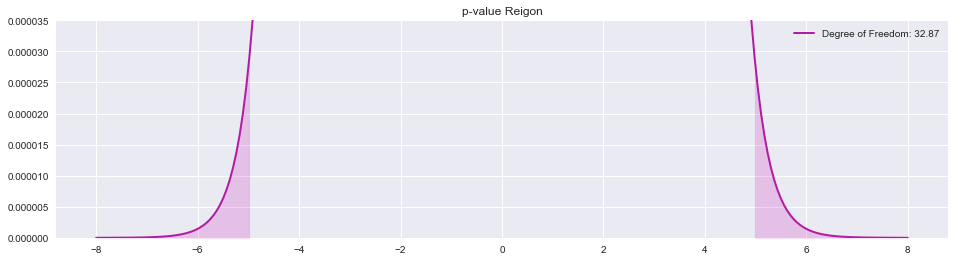

In [40]:
# generate the distribution
x = np.linspace(-8, 8, num=250)
students = stats.t(df)

# plot my df curve and try to shade
fig, ax = plt.subplots(1, figsize=(16, 4))
ax.set_ylim((0, 0.000035))
ax.plot(x, students.pdf(x), linewidth=2, label="Degree of Freedom: {:2.2f}".format(df), color=fuchsia_d)
_ = ax.fill_between(x, students.pdf(x), where=(x >= abs(t)), color=fuchsia, alpha=0.25)
_ = ax.fill_between(x, students.pdf(x), where=(x <= - abs(t)), color=fuchsia, alpha=0.25)
ax.legend()
ax.set_title("p-value Reigon")
plt.savefig('img/tzoom.png');

This is the the same plot with an extremely magnified y resolution. The tails are so thin at t = 4.95 that the shading is invisible on a regular plot. Thus I can very confidently reject my null hypothesis.